In [17]:
from skimage import io, util, measure, transform
from copy import copy
import numpy as np
import matplotlib.pyplot as plt
from src.utils.general import make_training_set
from src.utils.cellpose_segment import cellpose_segmenter

In [6]:
stack_name = 'max_expanded.tif'
mask, = cellpose_segmenter( folder_path = '../4 Raw data',stack_name=stack_name, three_axes = False, cell_diameter = 23, min_size = 300, gpu = False)
mask.shape

  0%|          | 0/1 [00:00<?, ?it/s]

> Segmentation will be performed on: ../4 Raw data/max_expanded.tif  (XY)
> Loading max_expanded.tif
> Loaded  max_expanded.tif, shape: (1, 517, 517), dtype: uint8
Initializing CPU model...


100%|██████████| 1/1 [00:35<00:00, 35.38s/it]

> Saved to ../4 Raw data/max_expanded_mask_XY.npy
> Done!


(1, 517, 517)

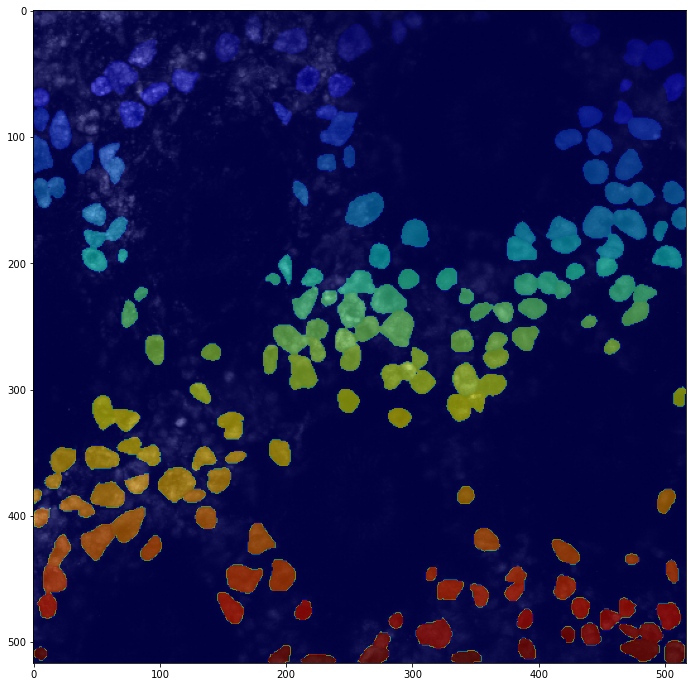

In [11]:
stack = io.imread(f'../4 Raw data/{stack_name}')

fig = plt.figure(figsize=(12,12))
plt.imshow(stack[0], cmap='gray')
plt.imshow(mask[0], cmap='jet', alpha=0.5)

In [32]:
DS = make_training_set(stack[0], mask[0], offset = 5, make_zero=False, plot=False)

Number of estimated cells: 185


In [33]:
DSS = copy(DS)
for i in range(len(DSS)):
    img = transform.resize(DSS[i], (30,30))
    DSS[i] = img / np.max(img)
montage = util.montage(DSS)

(-0.5, 419.5, 419.5, -0.5)

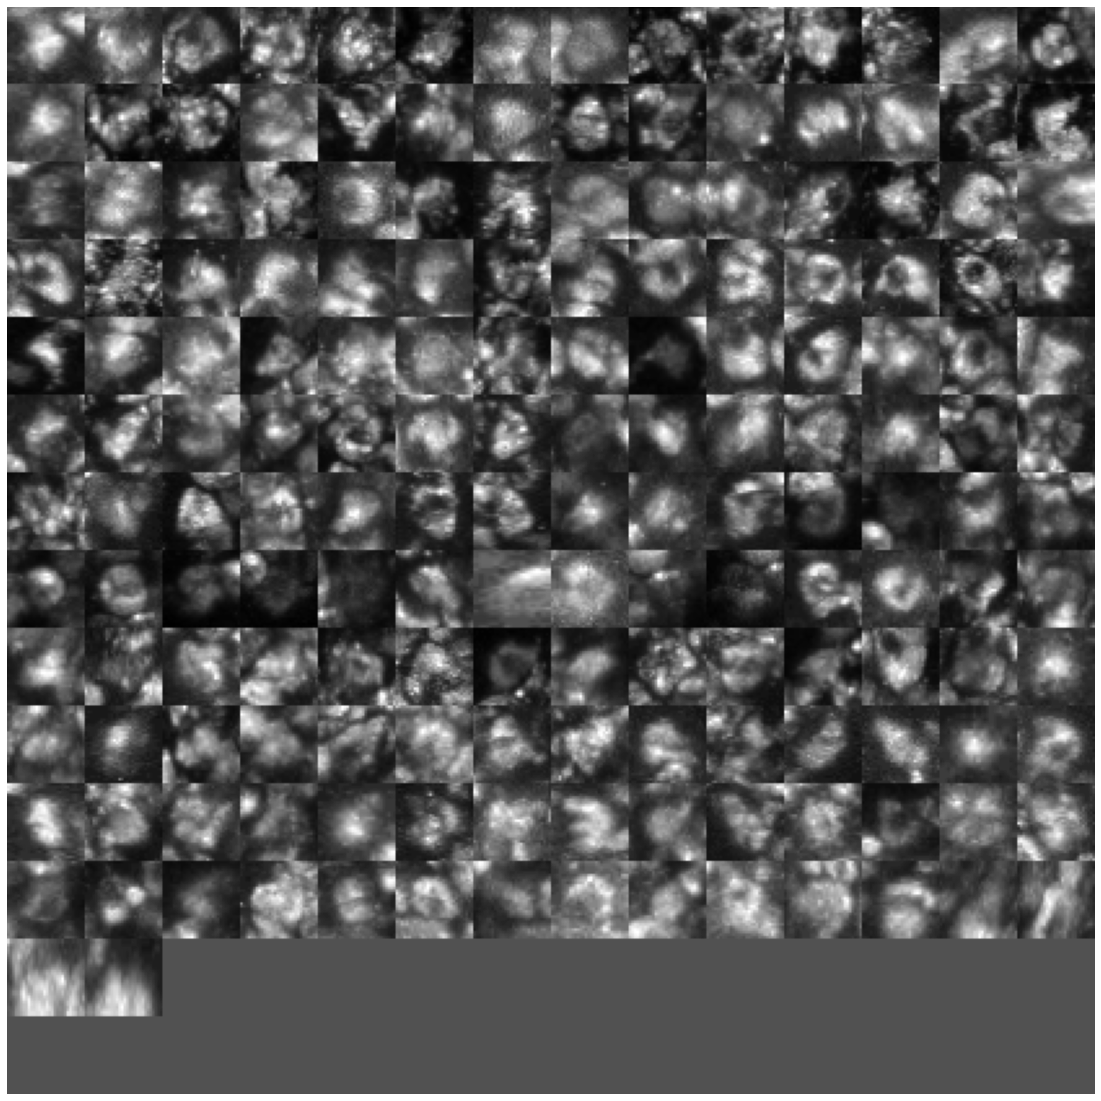

In [34]:
fig = plt.figure(figsize=(20,20))
plt.imshow(montage, cmap='gray')
plt.axis('off')

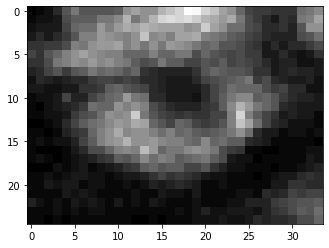

In [36]:
plt.imshow(DS[50], cmap='gray')